In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
Toyota_df=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [3]:
Toyota_df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA

In [4]:
Toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

# using only few colums based on problem statement

In [5]:
Toyota=pd.concat([Toyota_df.iloc[:,2:4],Toyota_df.iloc[:,6:7],Toyota_df.iloc[:,8:9],Toyota_df.iloc[:,12:14],Toyota_df.iloc[:,15:18]],axis=1)

In [6]:
Toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
Toyota=Toyota.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)

In [8]:
Toyota

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
Toyota[Toyota.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
Toyota=Toyota.drop_duplicates().reset_index(drop=True)

In [11]:
Toyota

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [12]:
Toyota.nunique()

Price      236
Age         77
KM        1263
HP          12
CC          13
Doors        4
Gears        4
QT          13
Weight      59
dtype: int64

In [13]:
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   CC      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   QT      1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


# Correlation

In [14]:
Toyota.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


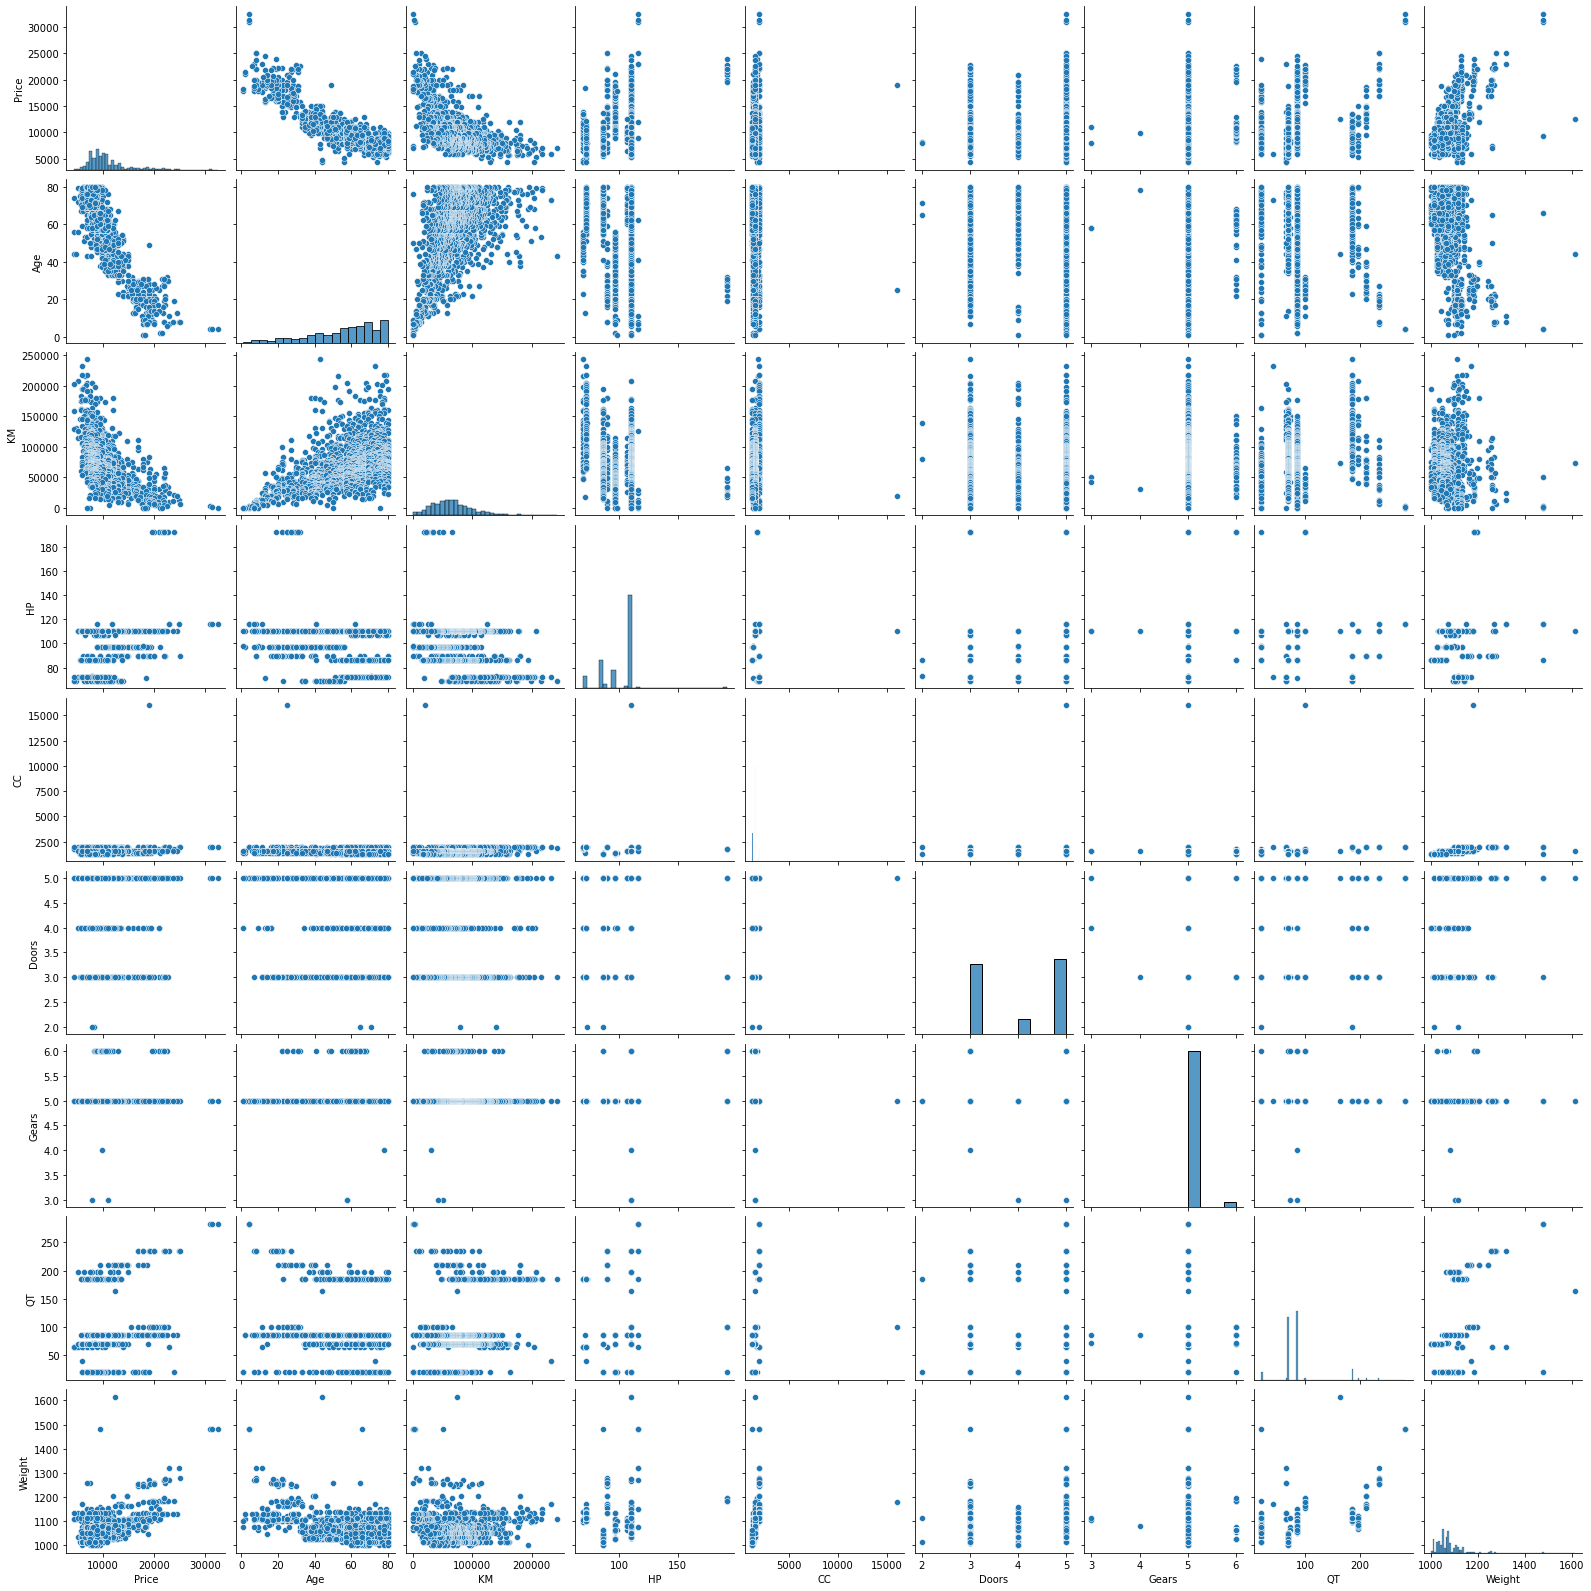

In [15]:
sns.pairplot(Toyota)

# Handling_Outliers

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

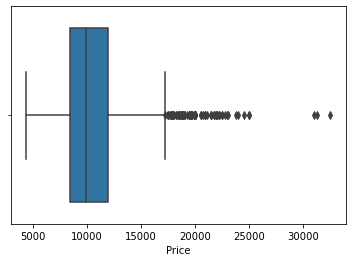

In [16]:
sns.boxplot(Toyota["Price"])

In [17]:
Toyota[(Toyota["Price"])>25000]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
109,32500,4,1,116,2000,5,5,283,1480
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480


In [18]:
Toyota_1=Toyota[(Toyota["Price"])<25000]

In [19]:
Toyota_1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

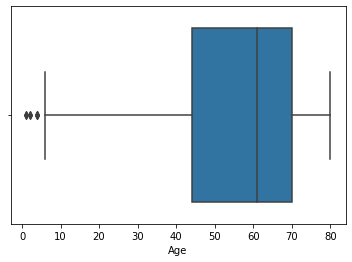

In [20]:
sns.boxplot(Toyota["Age"])

In [21]:
Toyota_1[(Toyota_1["Age"])<5]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
181,21125,2,225,97,1400,5,5,85,1110
182,21500,2,15,110,1600,5,5,85,1130
183,17795,1,1,98,1400,4,5,19,1100
184,18245,1,1,110,1600,5,5,19,1075


In [22]:
Toyota_2=Toyota_1[Toyota_1["Age"]>5]

In [23]:
Toyota_2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KM'>

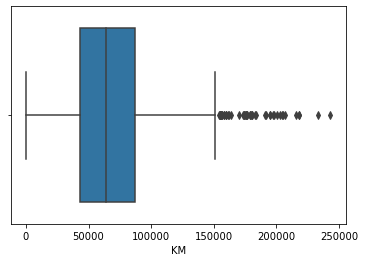

In [24]:
sns.boxplot(Toyota_2["KM"])

In [25]:
Toyota_2[Toyota_2["KM"]>210000]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
185,6950,43,243000,69,1900,3,5,185,1110
377,6500,53,216000,69,1900,3,5,185,1110
1043,5900,73,232940,72,2000,5,5,40,1172
1044,6950,79,218118,72,2000,5,5,185,1150
1045,6000,78,217764,72,2000,5,5,185,1135


In [26]:
Toyota_3=Toyota_2[Toyota_2["KM"]<210000]

In [27]:
Toyota_3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HP'>

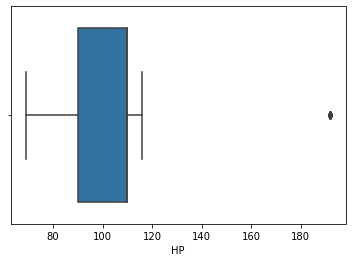

In [28]:
sns.boxplot(Toyota_3["HP"])

In [29]:
Toyota_3[Toyota_3["HP"]>160]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
8,21500,27,19700,192,1800,3,5,100,1185
10,20950,25,31461,192,1800,3,6,100,1185
11,19950,22,43610,192,1800,3,6,100,1185
12,19600,25,32189,192,1800,3,6,100,1185
13,21500,31,23000,192,1800,3,6,100,1185
14,22500,32,34131,192,1800,3,6,100,1185
15,22000,28,18739,192,1800,3,6,100,1185
16,22750,30,34000,192,1800,3,5,100,1185
49,21950,31,64982,192,1800,5,6,100,1195
53,21950,27,49866,192,1800,5,5,100,1195


In [30]:
Toyota_4=Toyota_3[Toyota_3["HP"]<160]

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CC'>

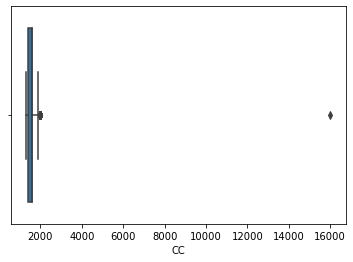

In [31]:
sns.boxplot(Toyota_4["CC"])

In [32]:
Toyota_4[Toyota_4["CC"]>1950]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1194,8750,74,89800,72,2000,3,5,185,1115
1201,6950,73,88186,72,2000,3,5,185,1115
1215,8500,70,85864,72,2000,5,5,185,1135
1319,9400,69,67092,72,2000,3,5,185,1115


In [33]:
Toyota_5=Toyota_4[Toyota_4["CC"]<1950]

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Doors'>

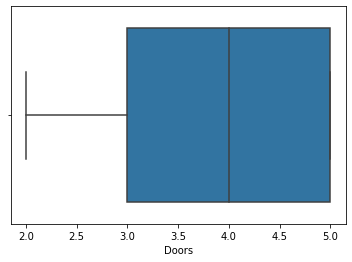

In [34]:
sns.boxplot(Toyota_5["Doors"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gears'>

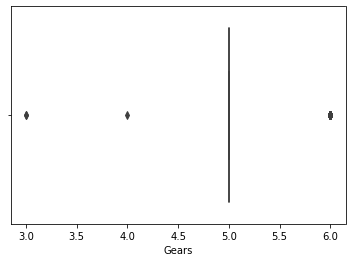

In [35]:
sns.boxplot(Toyota_5["Gears"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='QT'>

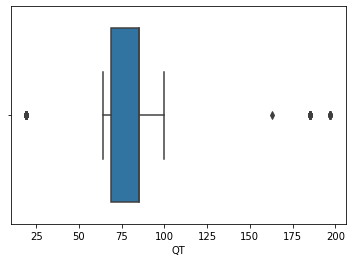

In [36]:
sns.boxplot(Toyota_5["QT"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

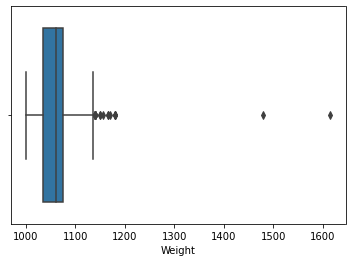

In [37]:
sns.boxplot(Toyota_5["Weight"])

In [38]:
Toyota_5[Toyota_5["Weight"]>1400]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
220,12450,44,74172,110,1600,5,5,163,1615
959,9390,66,50806,86,1300,3,5,19,1480


In [39]:
Toyota_6=Toyota_5[Toyota_5["Weight"]<1400]

In [40]:
Toyota_6

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
9,12950,23,71138,69,1900,3,5,185,1105
17,17950,24,21716,110,1600,3,5,85,1105
18,16750,24,25563,110,1600,3,5,19,1065
19,16950,30,64359,110,1600,3,5,85,1105
20,15950,30,67660,110,1600,3,5,85,1105
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [41]:
Toyota_6.reset_index(inplace=True)

In [42]:
Toyota_6.drop('index', axis=1, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_12568\3219685053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Toyota_6.drop('index', axis=1, inplace=True)


In [43]:
Toyota_6

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12950,23,71138,69,1900,3,5,185,1105
1,17950,24,21716,110,1600,3,5,85,1105
2,16750,24,25563,110,1600,3,5,19,1065
3,16950,30,64359,110,1600,3,5,85,1105
4,15950,30,67660,110,1600,3,5,85,1105
...,...,...,...,...,...,...,...,...,...
1289,7500,69,20544,86,1300,3,5,69,1025
1290,10845,72,19000,86,1300,3,5,69,1015
1291,8500,71,17016,86,1300,3,5,69,1015
1292,7250,70,16916,86,1300,3,5,69,1015


In [44]:
train=Toyota_6.iloc[:1283, :]
test=Toyota_6.iloc[1283:, :]

In [45]:
train

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12950,23,71138,69,1900,3,5,185,1105
1,17950,24,21716,110,1600,3,5,85,1105
2,16750,24,25563,110,1600,3,5,19,1065
3,16950,30,64359,110,1600,3,5,85,1105
4,15950,30,67660,110,1600,3,5,85,1105
...,...,...,...,...,...,...,...,...,...
1278,8150,76,36537,110,1600,4,5,85,1075
1279,8500,78,36000,86,1300,3,5,69,1045
1280,7600,78,36000,110,1600,3,5,69,1050
1281,7950,80,35821,86,1300,3,5,19,1015


In [46]:
test

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
1283,7950,80,34000,86,1300,4,5,69,1000
1284,9950,78,30964,110,1600,3,4,85,1080
1285,8950,71,29000,86,1300,3,5,69,1045
1286,8450,72,26000,86,1300,3,5,69,1015
1287,8950,78,24000,86,1300,5,5,85,1065
1288,8450,80,23000,86,1300,3,5,69,1015
1289,7500,69,20544,86,1300,3,5,69,1025
1290,10845,72,19000,86,1300,3,5,69,1015
1291,8500,71,17016,86,1300,3,5,69,1015
1292,7250,70,16916,86,1300,3,5,69,1015


# Model Building

In [47]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=train).fit()

# Model Parameters

In [48]:
model.params

Intercept   -14163.998148
Age           -113.699616
KM              -0.017471
HP              32.314156
CC              -3.581280
Doors         -133.990142
Gears          497.385790
QT              -0.203894
Weight          30.592023
dtype: float64

In [49]:
model.tvalues, model.pvalues

(Intercept    -7.879385
 Age         -43.725350
 KM          -13.424769
 HP            7.749747
 CC           -9.152077
 Doors        -3.312778
 Gears         2.755343
 QT           -0.123987
 Weight       17.765354
 dtype: float64,
 Intercept     7.008766e-15
 Age          7.824113e-256
 KM            1.574004e-38
 HP            1.871293e-14
 CC            2.156230e-19
 Doors         9.496675e-04
 Gears         5.946595e-03
 QT            9.013450e-01
 Weight        2.952437e-63
 dtype: float64)

In [50]:
model.rsquared, model.rsquared_adj

(0.8631520590256241, 0.8622927312958006)

# Building SLR and MLR models for insignificant variable 'QT'
# Also find tvalues and pvalues

In [51]:
slr_QT=smf.ols('Price~QT',data=train).fit()
slr_QT.tvalues , slr_QT.pvalues

(Intercept    32.728838
 QT            4.674930
 dtype: float64,
 Intercept    3.000434e-171
 QT            3.251370e-06
 dtype: float64)

# Model Validation
1. Collinearity Check & 2. Residual Analysis

In [52]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=train).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=train).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=train).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=train).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=train).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=train).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=train).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=train).fit().rsquared
vif_WT=1/(1-rsq_WT)


d1={'columns':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,columns,Vif
0,Age,2.041496
1,KM,1.634367
2,HP,1.978228
3,CC,2.693136
4,Doors,1.413746
5,Gears,1.048610
6,QT,1.606014
7,Weight,2.895892


# No column contain high VIF value

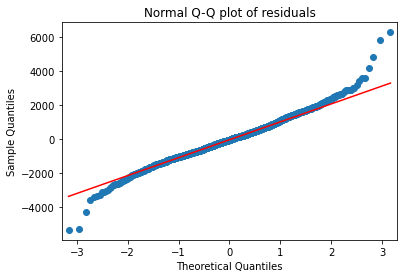

In [53]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [54]:
list(np.where(model.resid>4000))

[array([ 83, 103, 127, 456], dtype=int64)]

In [55]:
list(np.where(model.resid<-4000))

[array([140, 141, 332], dtype=int64)]

# Test for Homoscedasticity or Heteroscedasticity

In [56]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

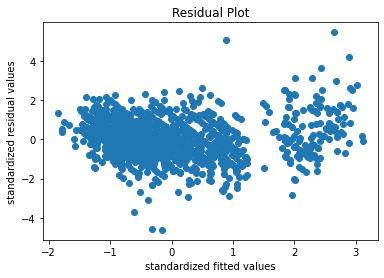

In [57]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [58]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 

eval_env: 1


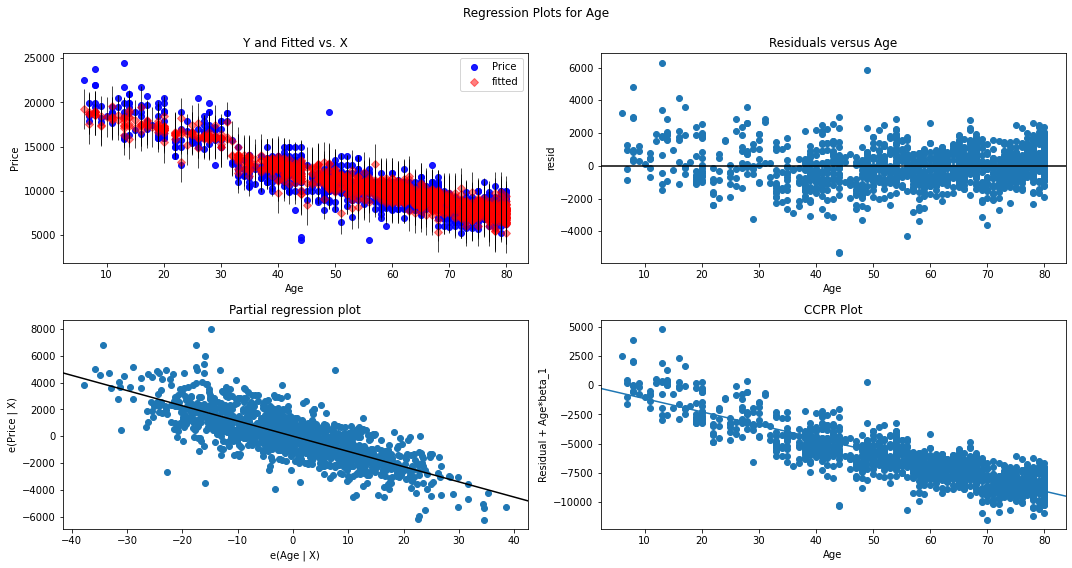

In [59]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


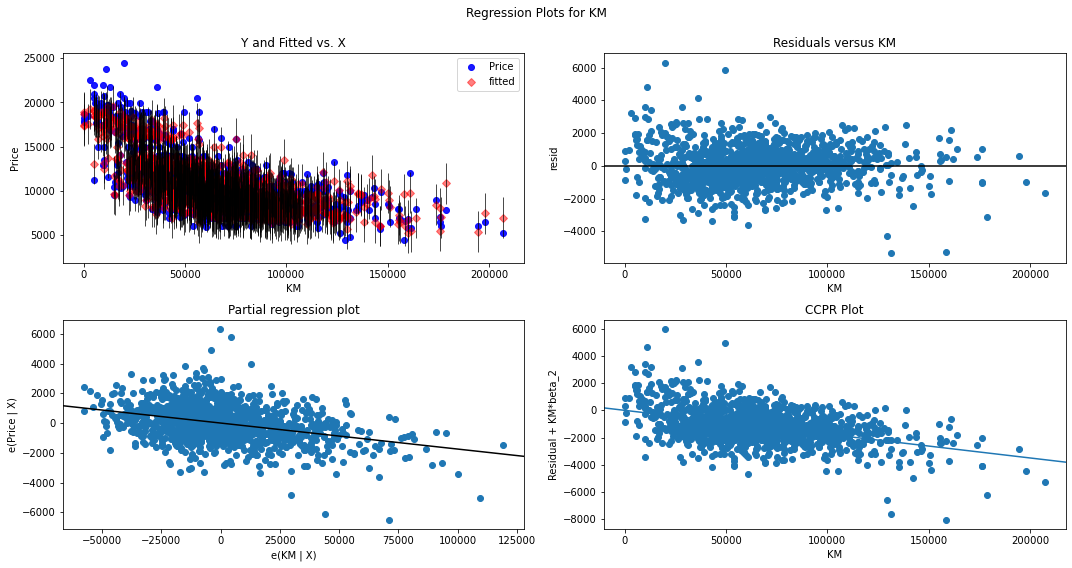

In [60]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


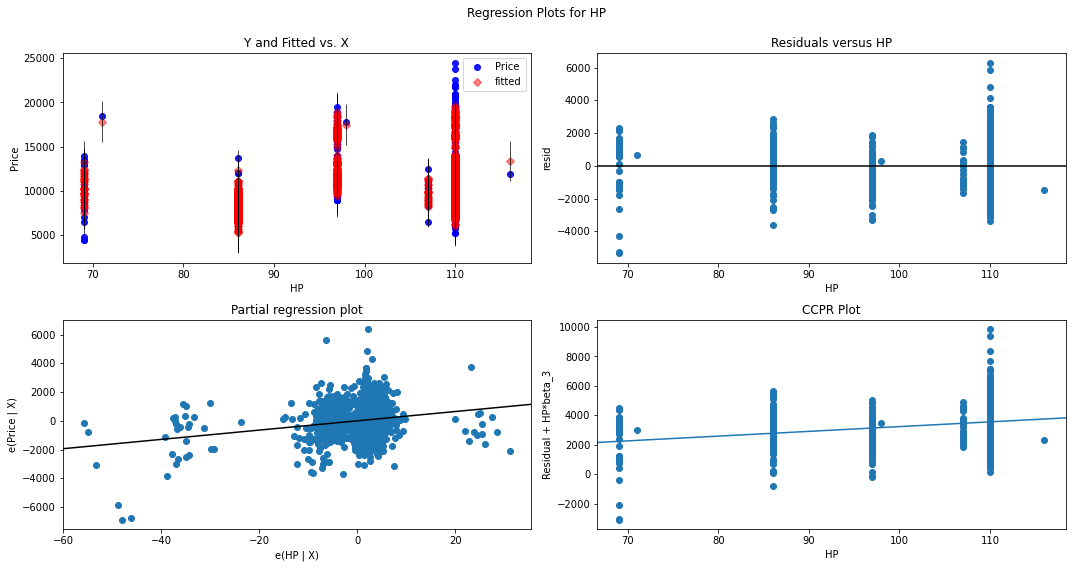

In [61]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


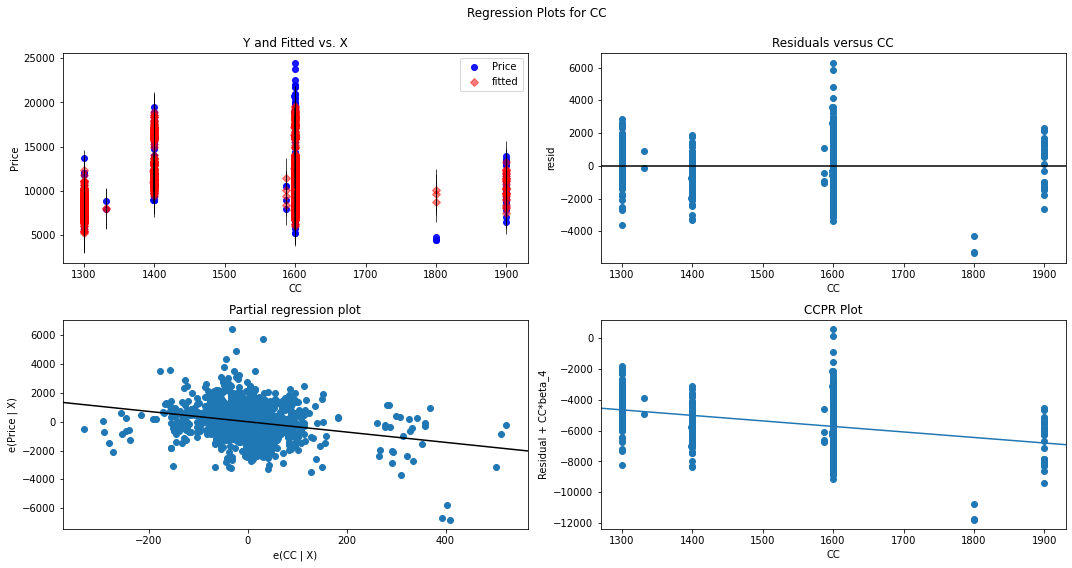

In [62]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


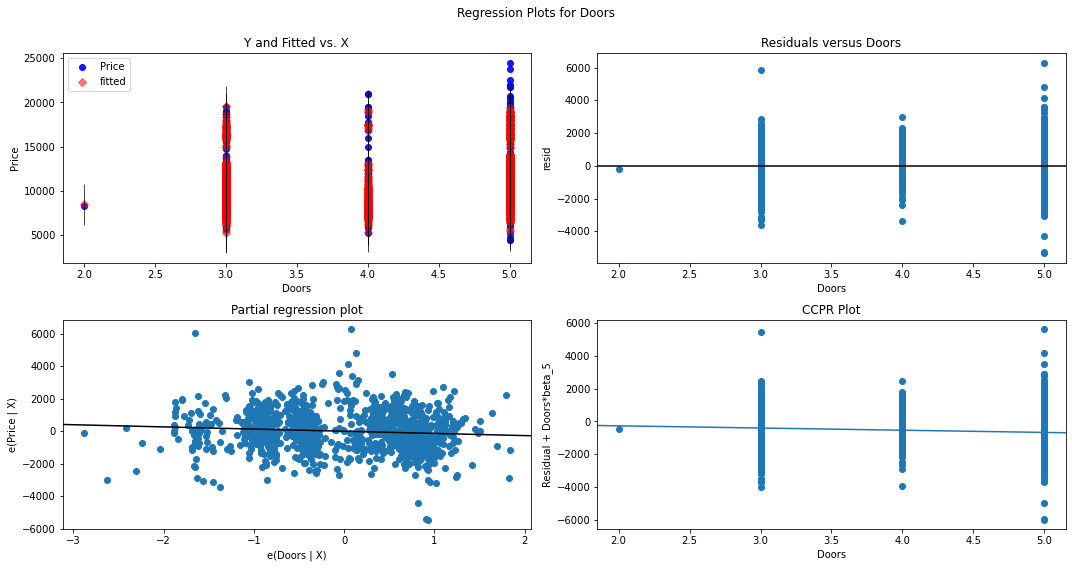

In [63]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


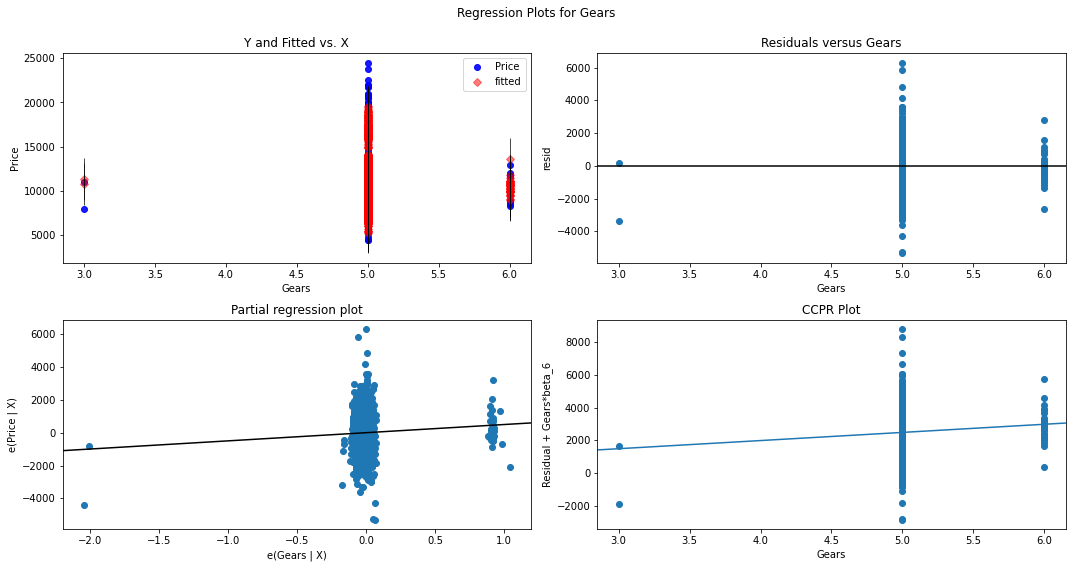

In [64]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


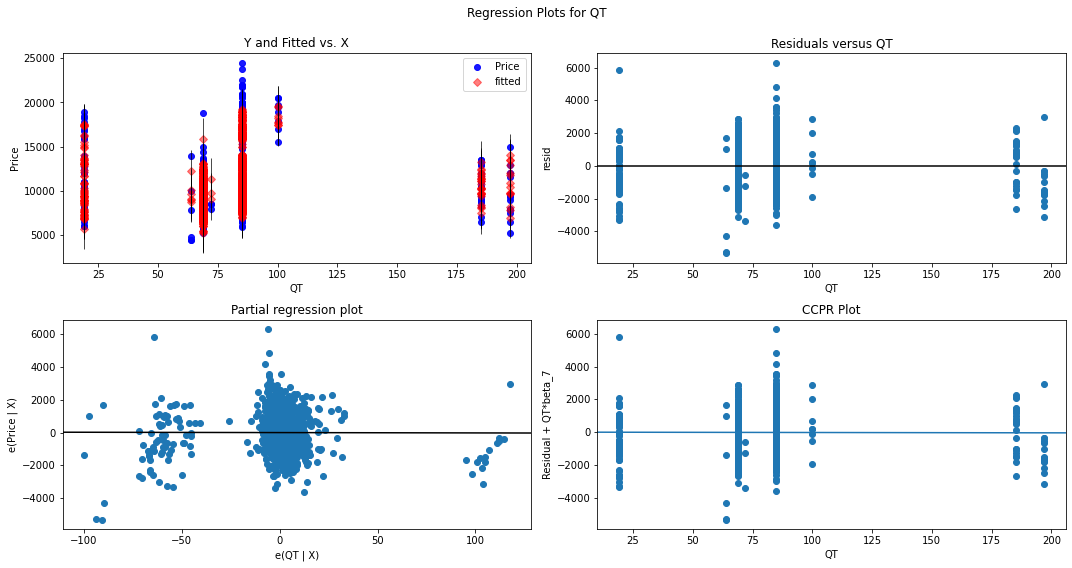

In [65]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


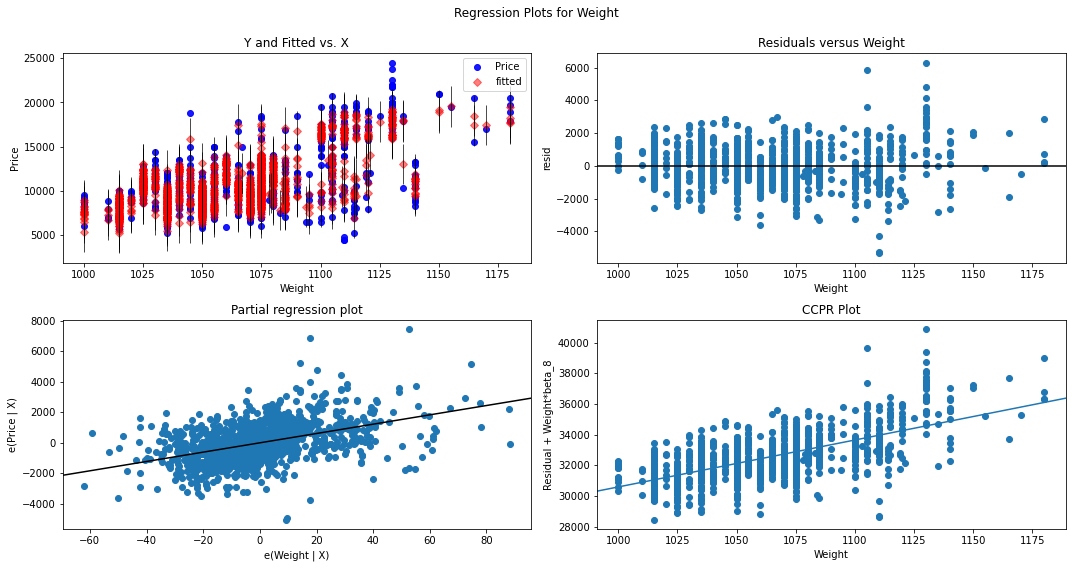

In [66]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)
1. Cook's Distance & 2. Leverage value

In [67]:
(c,_)=model.get_influence().cooks_distance
c

array([0.00032348, 0.00132139, 0.00271131, ..., 0.00031515, 0.00031915,
       0.00010102])

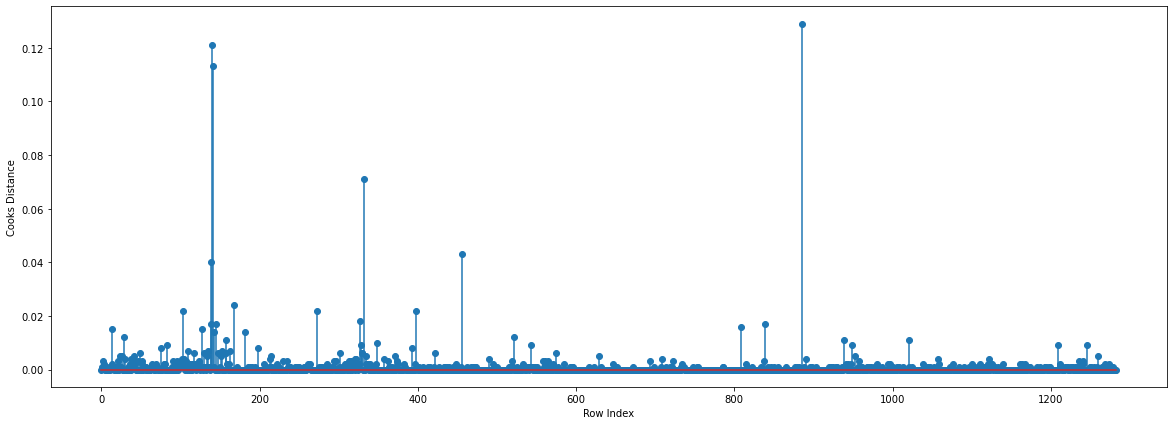

In [68]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(train)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

# No c value is more than 0.5

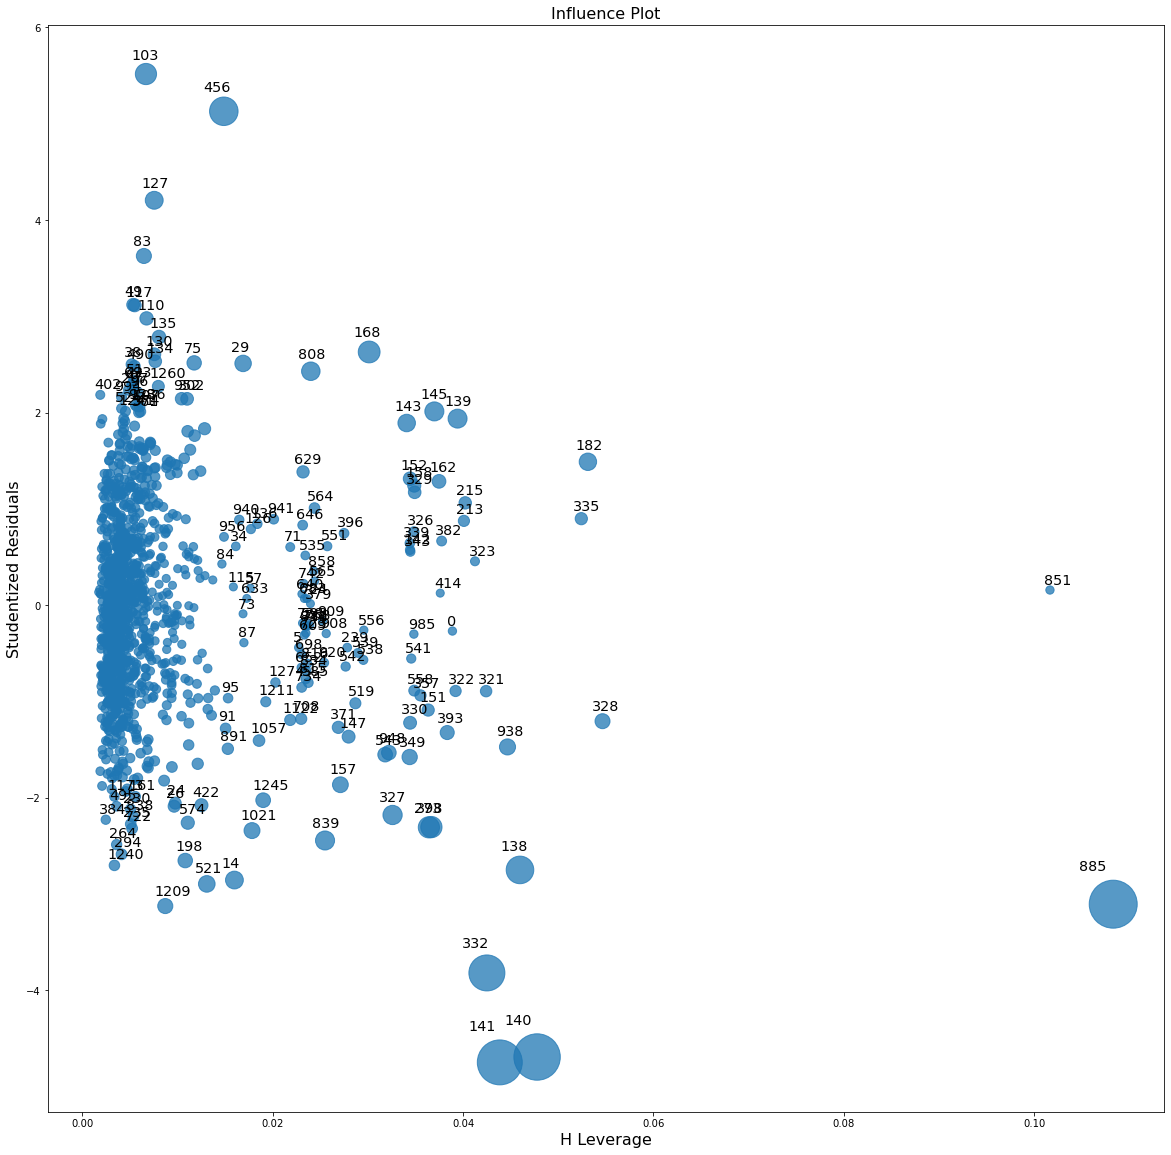

In [69]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [70]:
k=train.shape[1]
n=train.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.02338269680436477

In [71]:
train[train.index.isin([885])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
885,7950,58,43000,110,1600,4,3,72,1114


# improving the model

In [72]:
train_new=train.copy()
train_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12950,23,71138,69,1900,3,5,185,1105
1,17950,24,21716,110,1600,3,5,85,1105
2,16750,24,25563,110,1600,3,5,19,1065
3,16950,30,64359,110,1600,3,5,85,1105
4,15950,30,67660,110,1600,3,5,85,1105
...,...,...,...,...,...,...,...,...,...
1278,8150,76,36537,110,1600,4,5,85,1075
1279,8500,78,36000,86,1300,3,5,69,1045
1280,7600,78,36000,110,1600,3,5,69,1050
1281,7950,80,35821,86,1300,3,5,19,1015


In [73]:
train_1=train.drop(train_new.index[[885]],axis=0).reset_index(drop=True)
train_1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12950,23,71138,69,1900,3,5,185,1105
1,17950,24,21716,110,1600,3,5,85,1105
2,16750,24,25563,110,1600,3,5,19,1065
3,16950,30,64359,110,1600,3,5,85,1105
4,15950,30,67660,110,1600,3,5,85,1105
...,...,...,...,...,...,...,...,...,...
1277,8150,76,36537,110,1600,4,5,85,1075
1278,8500,78,36000,86,1300,3,5,69,1045
1279,7600,78,36000,110,1600,3,5,69,1050
1280,7950,80,35821,86,1300,3,5,19,1015


In [74]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=train_1).fit()
        (c,_)=model.get_influence().cooks_distance
        train_1=train_1.drop(train_1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=train_1).fit()
        print("The model accuracy is improved to",final_model.rsquared)

The model accuracy is improved to 0.8660146727894561
The model accuracy is improved to 0.8682752411598699
The model accuracy is improved to 0.8698360166986091
The model accuracy is improved to 0.8717028648769953
The model accuracy is improved to 0.8723530074832482
The model accuracy is improved to 0.8730849086739976
The model accuracy is improved to 0.8737256289045501
The model accuracy is improved to 0.8740808057373637
The model accuracy is improved to 0.8746752736128763
The model accuracy is improved to 0.8759238662331372
The model accuracy is improved to 0.8766685683375952
The model accuracy is improved to 0.8771429931945783
The model accuracy is improved to 0.8778083749186013
The model accuracy is improved to 0.87815875666214
The model accuracy is improved to 0.878537625820298
The model accuracy is improved to 0.8787078774471215
The model accuracy is improved to 0.8791147062462193
The model accuracy is improved to 0.8793938320163425
The model accuracy is improved to 0.8798118453186

In [75]:
test_1=test.iloc[:, 1:]
test_1

,Age,KM,HP,CC,Doors,Gears,QT,Weight
1283,80,34000,86,1300,4,5,69,1000
1284,78,30964,110,1600,3,4,85,1080
1285,71,29000,86,1300,3,5,69,1045
1286,72,26000,86,1300,3,5,69,1015
1287,78,24000,86,1300,5,5,85,1065
1288,80,23000,86,1300,3,5,69,1015
1289,69,20544,86,1300,3,5,69,1025
1290,72,19000,86,1300,3,5,69,1015
1291,71,17016,86,1300,3,5,69,1015
1292,70,16916,86,1300,3,5,69,1015


In [76]:
train_1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,17950,24,21716,110,1600,3,5,85,1105
1,16750,24,25563,110,1600,3,5,19,1065
2,16950,30,64359,110,1600,3,5,85,1105
3,15950,30,67660,110,1600,3,5,85,1105
4,16950,29,43905,110,1600,3,5,100,1170
...,...,...,...,...,...,...,...,...,...
1167,8150,76,36537,110,1600,4,5,85,1075
1168,8500,78,36000,86,1300,3,5,69,1045
1169,7600,78,36000,110,1600,3,5,69,1050
1170,7950,80,35821,86,1300,3,5,19,1015


In [77]:
final_model.predict(test_1)

1283     6740.447081
1284     9352.781714
1285     9725.112965
1286     8538.460804
1287     9215.156221
1288     7660.611964
1289     9334.890416
1290     8640.102204
1291     8784.086461
1292     8900.714661
1293    11408.773562
dtype: float64

In [78]:
test["Price"]-final_model.predict(test_1)

1283    1209.552919
1284     597.218286
1285    -775.112965
1286     -88.460804
1287    -265.156221
1288     789.388036
1289   -1834.890416
1290    2204.897796
1291    -284.086461
1292   -1650.714661
1293   -4458.773562
dtype: float64